In [1]:
import os
import pandas as pd
import numpy as np
import cv2

def CheckDir(dirname):
	if not os.path.exists(dirname):
		os.makedirs(dirname)

DATA_DIR="Data/PP_pins"
IM_SIZE=(299,299,3)

In [ ]:
images=[]
img_path=[]
for dirname, _, filenames in os.walk(DATA_DIR):
	print(dirname, len(filenames))
	for filename in filenames:
		try:
			f_path=os.path.join(dirname, filename)
			images.append(cv2.imread(f_path)[:,:,::-1])
			img_path.append(f_path)
		except Exception as e:
			print(filename, e)

In [ ]:
pins=pd.DataFrame({
	"Path":img_path,
	"Images": images
})
pins.to_pickle("Data/pins_RGB.pkl")

In [3]:
pins=pd.read_pickle("Data/pins_RGB.pkl")
pins.head()

,Path,Images
0,Data/PP_pins/000337a0ee7432d5453c7016a757d410.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Data/PP_pins/00201308aafb382364df742cd2c88367.jpg,"[[[94, 55, 84], [118, 80, 119], [100, 63, 115]..."
2,Data/PP_pins/00264f7f0e84a86fddd2dc390941c044.jpg,"[[[228, 237, 216], [228, 238, 214], [225, 233,..."
3,Data/PP_pins/0027d4a15fbca7694c80a3a96383292c.jpg,"[[[14, 63, 77], [15, 64, 78], [15, 64, 78], [1..."
4,Data/PP_pins/0028f6bcf10b0b32b8e5774fc21cc305.jpg,"[[[187, 188, 182], [188, 191, 184], [187, 189,..."


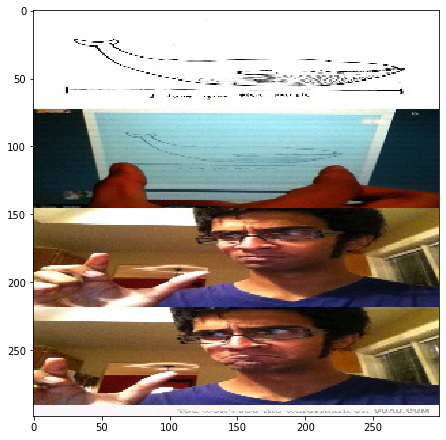

In [18]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,24))
img_index=641


fig.add_subplot(221)
plt.imshow(pins['Images'][3392])
plt.show()

In [8]:
from keras.applications.inception_v3 import InceptionV3

MODEL_DIR="../dgx/models/"

model=InceptionV3(weights=MODEL_DIR+"inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5",
				 include_top=False,
				 input_shape=(IM_SIZE),
				 pooling='avg')
features=model.predict(np.stack(pins['Images'].values))

In [9]:
FEATURE_DIR="Data/features/"
CheckDir(FEATURE_DIR)
np.save(FEATURE_DIR+"Inceptionv3_avg_RGB.npy",features)

In [2]:
pins_vgg=pd.read_pickle("Data/pins_RGB_vgg.pkl")
pins_vgg.head()

,Path,Images
0,Data/PP_pins_vgg/000337a0ee7432d5453c7016a757d...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Data/PP_pins_vgg/00201308aafb382364df742cd2c88...,"[[[103, 58, 91], [114, 76, 117], [96, 62, 113]..."
2,Data/PP_pins_vgg/00264f7f0e84a86fddd2dc390941c...,"[[[226, 240, 214], [220, 234, 208], [224, 234,..."
3,Data/PP_pins_vgg/0027d4a15fbca7694c80a3a963832...,"[[[19, 67, 77], [16, 64, 76], [16, 66, 77], [1..."
4,Data/PP_pins_vgg/0028f6bcf10b0b32b8e5774fc21cc...,"[[[184, 189, 183], [185, 190, 186], [186, 190,..."


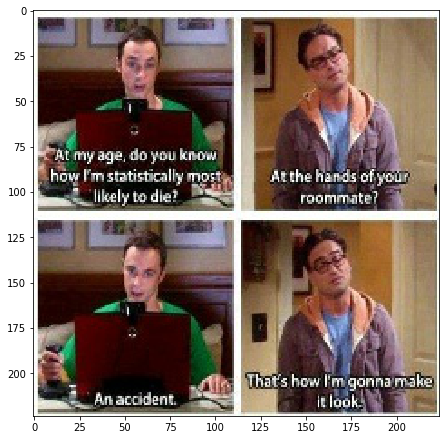

In [3]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,24))
img_index=641


fig.add_subplot(221)
plt.imshow(pins_vgg['Images'][3439])
plt.show()

## TODO:
Preprocess images for comparison among models

In [4]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3

MODEL_DIR="../dgx/models/"
models=[]
# models.append(("InceptionV3", InceptionV3(weights=MODEL_DIR+"inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5",
# 				 include_top=False,
# 				 input_shape=(IM_SIZE),
# 				 pooling='avg')))

FEATURE_DIR="Data/features/"
CheckDir(FEATURE_DIR)

models.append(("ResNet50", ResNet50(weights=MODEL_DIR+"resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5",
				 include_top=False,
				 input_shape=(224,224,3),
				 pooling='avg')))

models.append(("VGG16", VGG16(weights=MODEL_DIR+"vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
				 include_top=False,
				 input_shape=(224,224,3),
				 pooling='avg')))

models.append(("VGG19", VGG19(weights=MODEL_DIR+"vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5",
				 include_top=False,
				 input_shape=(224,224,3),
				 pooling='avg')))

for m_name,model in models:
	print(m_name)
	features=model.predict(np.stack(pins_vgg['Images'].values))
	print(features.shape)
	np.save(FEATURE_DIR+"%s_avg_RGB.npy"%m_name,features)

Using TensorFlow backend.


ResNet50
(4103, 2048)
VGG16
(4103, 512)
VGG19
(4103, 512)
